# Linear Algebra Assignment

### Question 1
Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('auto-mpg.csv')
data1=data.select_dtypes(include='number').copy()
data1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
x=data1.columns.tolist()
standard_scaler=StandardScaler()
y=data[x].to_numpy()
y_scaler=standard_scaler.fit_transform(y)
t_i=data[data['car name']=='toyota corona mark ii'].index[0]
t_v=y_scaler[t_i].reshape(1,-1)
similarities=cosine_similarity(y_scaler,t_v).flatten()
data['similarities']=similarities
y_scaler=standard_scaler.fit_transform(y)
df_filtered = data[data.index != t_i]

# Get top 5 most similar cars
top_5 = df_filtered.sort_values(by='similarities', ascending=False).head(5)
top_5


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,similarities
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510,0.984618
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona,0.983596
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop,0.980388
82,23.0,4,120.0,97,2506,14.5,72,3,toyouta corona mark ii (sw),0.980079
29,27.0,4,97.0,88,2130,14.5,71,3,datsun pl510,0.977138


### Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [3]:
df_filtered['ortho']=np.abs(data['similarities'])
ortho=df_filtered.sort_values(by='ortho').head(5)
ortho


C:\Users\shebi\AppData\Local\Temp\ipykernel_22564\3907585400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ortho']=np.abs(data['similarities'])


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,similarities,ortho
269,30.9,4,105.0,75,2230,14.5,78,1,dodge omni,-0.000669,0.000669
47,19.0,6,250.0,100,3282,15.0,71,1,pontiac firebird,-0.002935,0.002935
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,-0.003854,0.003854
211,16.5,6,168.0,120,3820,16.7,76,2,mercedes-benz 280s,0.003877,0.003877
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom,-0.004076,0.004076


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

C:\Users\shebi\AppData\Local\Temp\ipykernel_22564\2668820517.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].replace('?', np.nan, inplace=True)
C:\Users\shebi\AppData\Local\Temp\ipykernel_22564\2668820517.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

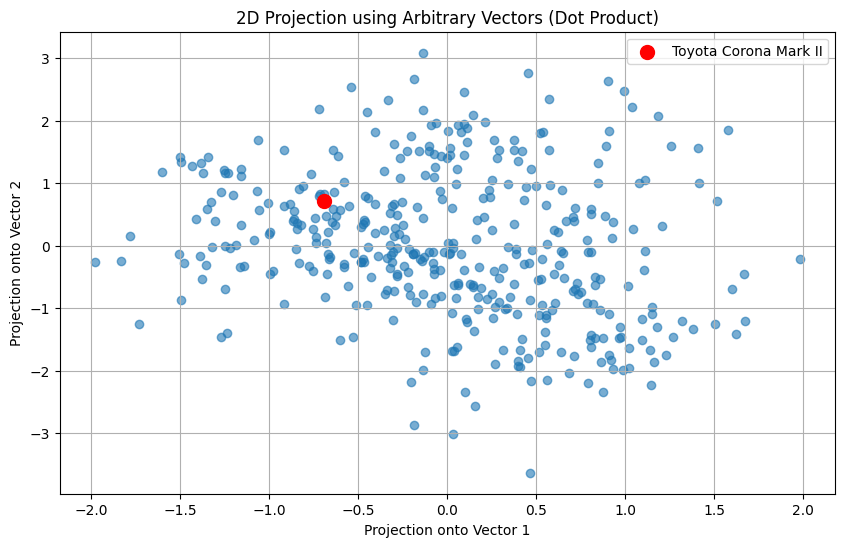

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('auto-mpg.csv')
data['horsepower'].replace('?', np.nan, inplace=True)
data['horsepower'] = data['horsepower'].astype(float)
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)


features = data.drop(columns=["car name"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

dim = scaled_data.shape[1]
np.random.seed(42)  
v1 = np.random.randn(dim)
v2 = np.random.randn(dim)

v1 = v1 / np.linalg.norm(v1)
v2 = v2 / np.linalg.norm(v2)


x_coords = scaled_data @ v1  
y_coords = scaled_data @ v2  

plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, alpha=0.6)

target_index = data[data['car name'].str.contains("toyota corona mark ii", case=False)].index[0]
plt.scatter(x_coords[target_index], y_coords[target_index], color='red', s=100, label='Toyota Corona Mark II')

plt.xlabel("Projection onto Vector 1")
plt.ylabel("Projection onto Vector 2")
plt.title("2D Projection using Arbitrary Vectors (Dot Product)")
plt.legend()
plt.grid(True)
plt.show()


### Question 4
Write a function that returns dot product of two list of numbers

In [4]:
# Your code here
def your_function_21(x,y):
    return x.dot(y)

x=np.array([1,2,3])
y=np.array([4,5,6])
your_function_21(x,y)
    

np.int64(32)

### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [8]:
# Your code here
def your_function_22(a,b):
    return (a.dot(b)/b.dot(b))*b

a=np.array([1,2,3])
b=np.array([2,3,4])
your_function_22(a,b)

array([1.37931034, 2.06896552, 2.75862069])

### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [15]:
# Your code here
class vector:
    def __init__(self,a,b):
        self.a=np.array(a)
        self.b=np.array(b)
    def addition(self):
        return self.a + self.b
    def dot_p(self):
        return self.a.dot(self.b)
    def magnitude(self):
        x=(np.sum(i**2 for i in self.a))**0.5
        y=(sum(i**2 for i in self.b))**0.5
        return x,y
a=[1,2,3]
b=[4,5,6]
v1=vector(a,b) 
v1.addition()  
v1.dot_p()  
v1.magnitude()   

C:\Users\shebi\AppData\Local\Temp\ipykernel_22564\2749140209.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  x=(np.sum(i**2 for i in self.a))**0.5


(np.float64(3.7416573867739413), np.float64(8.774964387392123))

### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [18]:
# Your code here
def your_function_28(a):
    x=np.array(a)
    l1_norm=np.sum(np.abs(x))
    l2_norm=np.sqrt(np.sum(x**2))

    return l1_norm,l2_norm
a=[1,2,3]

your_function_28(a)


(np.int64(6), np.float64(3.7416573867739413))